In [1]:
import numpy as np
import pandas as pd

In [2]:
matches=pd.read_csv('csv_files/matches.csv')
delivery=pd.read_csv('csv_files/deliveries.csv')

In [3]:
matches.shape

(756, 18)

In [4]:
matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
delivery.shape

(179078, 21)

In [6]:
total_score_df=delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [7]:
total_score_df=total_score_df[total_score_df['inning']==1]

In [8]:
total_score_df

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1518,11347,1,143
1520,11412,1,136
1522,11413,1,171
1524,11414,1,155


In [9]:
matches_df=matches.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [10]:
matches_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157


In [11]:
matches_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [12]:
teams=['Sunrisers Hyderabad', 'Mumbai Indians','Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 
       'Delhi Capitals']

In [13]:
matches_df['team1']=matches_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
matches_df['team2']=matches_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')
                                                
matches_df['team1']=matches_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
matches_df['team2']=matches_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')



In [14]:
matches_df=matches_df[matches_df['team1'].isin(teams)]
matches_df=matches_df[matches_df['team2'].isin(teams)]

In [15]:
matches_df.shape

(641, 20)

In [16]:
matches_df=matches_df[matches_df['dl_applied']==0]

In [17]:
matches_df.shape

(626, 20)

In [18]:
match_df=matches_df[['match_id','city','winner','total_runs']]

In [19]:
delivery_df=match_df.merge(delivery,on='match_id')

In [20]:
delivery_df=delivery_df[delivery_df['inning']==2]

In [21]:
delivery_df.shape

(72413, 24)

In [22]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [29]:
delivery_df_total_runs_y = delivery_df[['match_id','total_runs_y']]

,match_id,total_runs_y
125,1,1
126,1,0
127,1,0
128,1,2
129,1,4
...,...,...
149573,11415,1
149574,11415,2
149575,11415,1
149576,11415,2


,total_runs_y
125,1
126,1
127,1
128,3
129,7
...,...
149573,152
149574,154
149575,155
149576,157


In [31]:
delivery_df['current_score']= delivery_df_total_runs_y.groupby('match_id').cumsum()['total_runs_y']

In [32]:
delivery_df['runs_left']=delivery_df['total_runs_x']-delivery_df['current_score']

In [33]:
delivery_df['bowls_left']=126-(delivery_df['over']*6+delivery_df['ball'])

In [34]:
delivery_df['player_dismissed']=delivery_df['player_dismissed'].fillna("0")

In [ ]:
# wickets left
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x: x if x=="0" else "1")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')

In [37]:
delivery_df_with_wickets = delivery_df[['match_id','player_dismissed']]

In [38]:

wickets = delivery_df_with_wickets.groupby('match_id').cumsum()['player_dismissed'].values
delivery_df['wickets']=10 - wickets
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,bowls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,206,119,10
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,118,10
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,117,10
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,204,116,10
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,200,115,10


In [39]:
# crr= runs/over
delivery_df['curr_run_rate']=delivery_df['current_score']*6/(120-delivery_df['bowls_left'])

In [40]:
# req run rate
delivery_df['requ_run_rate']=delivery_df['runs_left']*6/(delivery_df['bowls_left'])

In [41]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,bowls_left,wickets,curr_run_rate,requ_run_rate
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,NaN,NaN,1,206,119,10,6.0,10.386555
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,NaN,NaN,1,206,118,10,3.0,10.474576
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,NaN,NaN,1,206,117,10,2.0,10.564103
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,NaN,NaN,3,204,116,10,4.5,10.551724
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,NaN,NaN,7,200,115,10,8.4,10.434783


In [42]:
def result(row):
    return 1 if row['batting_team']==row['winner'] else 0

In [43]:
delivery_df['Result']=delivery_df.apply(result,axis=1)

In [44]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,bowls_left,wickets,curr_run_rate,requ_run_rate,Result
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,NaN,NaN,1,206,119,10,6.0,10.386555,0
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,NaN,NaN,1,206,118,10,3.0,10.474576,0
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,NaN,NaN,1,206,117,10,2.0,10.564103,0
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,NaN,NaN,3,204,116,10,4.5,10.551724,0
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,NaN,NaN,7,200,115,10,8.4,10.434783,0


In [45]:
final_df=delivery_df[['batting_team','bowling_team','city','runs_left','bowls_left','wickets','total_runs_x','curr_run_rate','requ_run_rate','Result']]

In [46]:
final_df=final_df.sample(final_df.shape[0])

In [47]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,bowls_left,wickets,total_runs_x,curr_run_rate,requ_run_rate,Result
7441,Kings XI Punjab,Chennai Super Kings,Chandigarh,152,71,9,240,10.77551,12.84507,0


In [48]:
final_df.dropna(inplace=True)

In [49]:
final_df=final_df[final_df['bowls_left']!=0]

In [50]:
x=final_df.iloc[:,:-1]
y=final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [51]:
X_train

,batting_team,bowling_team,city,runs_left,bowls_left,wickets,total_runs_x,curr_run_rate,requ_run_rate
2832,Delhi Daredevils,Sunrisers Hyderabad,Hyderabad,132,80,9,191,8.850000,9.900000
14499,Kings XI Punjab,Chennai Super Kings,Chennai,86,46,7,181,7.702703,11.217391
31376,Kolkata Knight Riders,Chennai Super Kings,Centurion,18,11,7,188,9.357798,9.818182
52855,Rajasthan Royals,Mumbai Indians,Jaipur,0,15,7,94,5.371429,0.000000
101091,Delhi Daredevils,Chennai Super Kings,Chennai,150,119,10,150,0.000000,7.563025
...,...,...,...,...,...,...,...,...,...
90298,Delhi Daredevils,Mumbai Indians,Sharjah,72,62,9,125,5.482759,6.967742
89870,Rajasthan Royals,Royal Challengers Bangalore,Abu Dhabi,10,50,7,70,5.142857,1.200000
141245,Chennai Super Kings,Rajasthan Royals,Jaipur,133,80,6,158,3.750000,9.975000
139364,Kolkata Knight Riders,Royal Challengers Bangalore,Bengaluru,94,52,8,210,10.235294,10.846154


In [52]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


In [58]:
trf=ColumnTransformer([
    ('trf',OneHotEncoder(sparse_output=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [59]:
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline

In [60]:
pipe=Pipeline(steps=[('step1',trf),('step2',LogisticRegression(solver='liblinear'))])

In [61]:
pipe.fit(X_train,Y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [62]:
X_train.describe()

,runs_left,bowls_left,wickets,total_runs_x,curr_run_rate,requ_run_rate
count,57073.000000,57073.000000,57073.000000,57073.000000,57073.000000,57073.000000
mean,92.728698,62.949328,7.552188,165.713209,7.442396,10.394909
std,49.888317,33.250273,2.125755,29.302245,2.276507,13.649739
min,-16.000000,-2.000000,0.000000,65.000000,0.000000,-510.000000
25%,53.000000,35.000000,6.000000,147.000000,6.263736,7.159091
50%,92.000000,64.000000,8.000000,165.000000,7.482353,8.884615
75%,130.000000,92.000000,9.000000,185.000000,8.697248,10.896552
max,249.000000,119.000000,10.000000,250.000000,42.000000,582.000000


In [63]:
y_pred = pipe.predict(X_test)

In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.7975331137430794

In [65]:
pipe.predict_proba(X_test)[12]

array([0.56238514, 0.43761486])

In [66]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','bowls_left','wickets','total_runs_x','curr_run_rate','requ_run_rate']].dropna()
    temp_df = temp_df[temp_df['bowls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target

In [67]:
temp_df,target =match_progression(delivery_df,74,pipe)
temp_df

Target- 178


,end_of_over,runs_after_over,wickets_in_over,lose,win
10459,1,4,0,56.6,43.4
10467,2,8,0,51.2,48.8
10473,3,1,0,57.9,42.1
10479,4,7,1,69.7,30.3
10485,5,12,0,59.6,40.4
10491,6,13,0,47.2,52.8
10497,7,9,0,41.2,58.8
10505,8,15,0,27.3,72.7
10511,9,7,0,25.1,74.9
10518,10,17,0,13.7,86.3


Text(0.5, 1.0, 'Target-178')

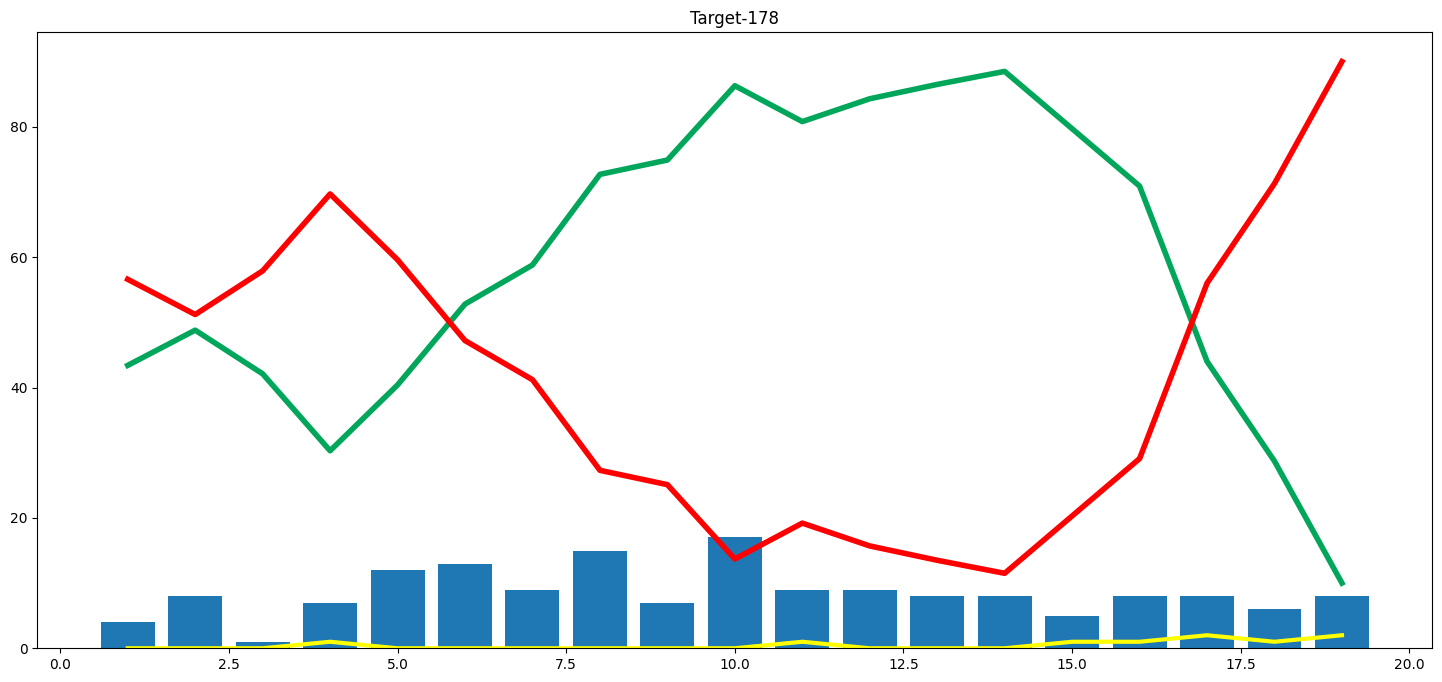

In [69]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [70]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [71]:
delivery_df['city'].unique()

array(['Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi',
       'Sharjah', nan, 'Mohali', 'Bengaluru'], dtype=object)

In [72]:
import pickle
pickle.dump(pipe,open('pkl_file/matchwinpredictormodel(pip).pkl','wb'))
    